In [3]:
import requests
import pprint
import json
import time
def get_api_json(url):
    try:
        r = requests.get(url, timeout=3)
        r_json = r.json()
        return r_json
    except:
        return get_api_json(url)

if __name__ == '__main__':
    pass

In [4]:
#Get IDs of 100 high skill random matches 
pubmatch_info = get_api_json('https://api.opendota.com/api/publicMatches?key=7b1b6c3c-77eb-4a60-aae6-da813c18b2ab')
matchesid=[]
for i in range(100):
    matchesid.append(pubmatch_info[i]['match_id'])

In [5]:
#Retrive detail information of these matches including player's id, heroes id and match result.
#Use a 1 dimension vector to record the lineup of each team

players=[]
for match_id in matchesid:
    url='https://api.opendota.com/api/Matches/'+str(match_id)+'?key=7b1b6c3c-77eb-4a60-aae6-da813c18b2ab'
    match_info = get_api_json(url)
    time.sleep(1)
    for player in match_info['players']:
        if player['account_id'] is not None:
            players.append(player['account_id'])

In [6]:
matchesid=[]
for i in range(len(players)):
    url='https://api.opendota.com/api/players/'+str(players[i])+'/recentMatches?key=7b1b6c3c-77eb-4a60-aae6-da813c18b2ab'
    matches_info = get_api_json(url)
    time.sleep(2)
    for match in matches_info:
        matchesid.append(match['match_id'])

In [183]:
lineups=[]
result=[]
durations=[]
progress=0
for i in range(5000):
    lineup=[0 for i in range(118)]*2
    url='https://api.opendota.com/api/Matches/'+str(matchesid[i])+'?key=7b1b6c3c-77eb-4a60-aae6-da813c18b2ab'
    matches_info=get_api_json(url)
    time.sleep(1.8)
    progress+=1
    if not progress%100:
        print(progress)
    result.append(matches_info['radiant_win'])
    durations.append(matches_info['duration'])
    for player in matches_info['players']:
        hero=player['hero_id']
        if hero is None:
            continue
        else:
            if hero==119 or hero==120 or hero==121:
                hero=hero-5
            elif hero==129:
                hero=117
            else:
                hero-=1
            if player['player_slot']<128:
                lineup[hero]=1
            else:
                lineup[hero+118]=1
    lineups.append(lineup)

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100


KeyboardInterrupt: 

In [186]:
import numpy as np
lineups=np.array(lineups)
y=np.array(result)
X_train, X_test, y_train, y_test = train_test_split(lineups, y, test_size=0.3, random_state=0)


In [187]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [189]:
classifier = LogisticRegression(random_state=0,solver='lbfgs')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
confusionmatrix = confusion_matrix(y_test, y_pred)
print(confusionmatrix)
accuracy=(176+225)/(218+332)
print(accuracy)

[[218 225]
 [176 332]]
0.7290909090909091


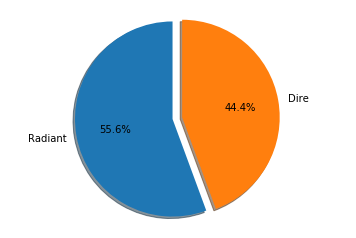

In [228]:
import matplotlib.pyplot as plt
labels = 'Radiant','Dire'
sizes = [sum(y_train)/len(y_train),1-sum(y_train)/len(y_train)]
explode = (0, 0.1) 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.savefig('WinRate.jpg')
plt.show()


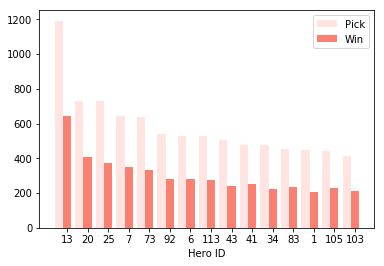

In [227]:
num_list = np.sum(lineups,axis=0)
numlist=[0 for i in range(118)]
for i in range(118):
    numlist[i]=num_list[i]+num_list[i+118]
numlistwin=[0 for i in range(118)]
for i in range(118):
    numlistwin[i]=sum(lineups[:,i]*y+lineups[:,i+118]*~y)
namelist=range(118)
Z = zip(numlist,numlistwin,namelist)
Z = sorted(Z,reverse=True)
numlist,numlistwin,namelist=zip(*Z)
plt.bar(range(15), numlist[0:15], width=0.4,label='Pick',fc = 'mistyrose')
plt.bar(np.arange(0.4,15.4,1), numlistwin[0:15], width=0.4,tick_label=namelist[0:15], label='Win',fc = 'salmon')
plt.xlabel('Hero ID')
plt.legend()
plt.savefig('WinPick.jpg')
plt.show()

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


<function matplotlib.pyplot.show(*args, **kw)>

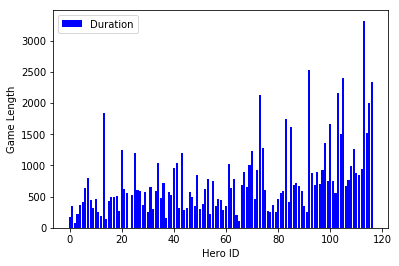

In [226]:
durationForHero=[0 for i in range(118)]
for i in range(118):
    durationForHero[i]=sum(lineups[:,i]*np.array(durations))/numlist[i]
heroId=range(118)
X = zip(durationForHero,heroId)
X = sorted(X,reverse=True,key= lambda t: t[0])
durationForHero,heroId = zip(*X)
plt.bar(heroId, durationForHero,label='Duration',fc = 'b')
plt.xlabel('Hero ID')
plt.ylabel('Game Length')
plt.legend()
plt.savefig('Game Duration')
plt.show